In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
Bad_wells_to_remove_GA2 = {
    2: { 
        'B5', 'B10', #'F1-G3', 
    },
    6: { #C7, #H8
    },
    8: { #A2, A6, B5, C8, F1, F7, F9, H7, H10
        'A4', 'C1', 'F4', 'F6', 'G9', 'G10', 'G12', 'H2', 'H3', 
    },
    10: { #A2, A4, B5, C8, F1, F6, H7, H10   
        'C11', 'F4', 'G9', 'G10', 'G12', 'H2', 'H3',
    },
    12: {
        'A2','A4','A6','C8','C9','C11','D12','E4','E8','F2','F4', 'G10','G11','G12','H1','H2','H3','H7','H9',
    }
}


In [3]:
experiment = 'GA2'

# GA2
input_file = 'GA2 Multiple invasion summary.xlsx'
key_file = 'GA2 parasitemia.xlsx'
filter_map = Bad_wells_to_remove_GA2
parasitemia_file = "GA2 parasitemia"

df_raw_unfiltered = pd.read_excel(input_file)

# Initialize an empty DataFrame to store the filtered results
df_raw = pd.DataFrame()

for day, dfg in df_raw_unfiltered.groupby('Day'):
    filter_map_day = filter_map.get(day, set())
    keep_indices = dfg.index.intersection(df_raw_unfiltered.query('Well0 not in @filter_map_day').index)
    df_raw = pd.concat([df_raw, df_raw_unfiltered.loc[keep_indices]])

print(f'filtered from {len(df_raw_unfiltered.index)} to {len(df_raw.index)} rows')

# df.head()

### Add keys based on other excel file
df_keys = pd.read_excel(key_file, header=3)
df_keys.columns = df_keys.columns.str.strip()
df_keys['Well'] = df_keys['Well position'].str.strip()
for col in df_keys.select_dtypes(include=['object']):
    df_keys[col] = df_keys[col].str.strip()

transfer_keys = ['Line', 'Speed', 'Plate']
transfer_keys = [k for k in transfer_keys if k in df_keys.columns]
print(transfer_keys)
# df_keys.head()

df = pd.merge(df_raw, df_keys[['Well'] + transfer_keys], on='Well', how='left')

### Compute percentages
ring_cols = ['Single', 'Double', 'Triple', 'Quadruple', 'Higher']
infected_cols = ring_cols + ['Lates']

# compute rates
df['Total rings'] = df[ring_cols].sum(axis=1)
df['Total infected'] = df[infected_cols].sum(axis=1)

for c in ring_cols:
    df[f'{c}'] = df[c]/df['Total rings']*100
df[f'Lates'] = df['Lates']/df['Total infected']*100

df

filtered from 456 to 432 rows
['Line', 'Speed']


,Unnamed: 0,Well,Double,Higher,Infected,Lates,Quadruple,RBCs,Single,Singlets,Triple,fcs,Well0,Day,Line,Speed,Total rings,Total infected
0,0,A1,21.535181,1.172708,974,3.696099,1.705757,76415,68.017058,75451,7.569296,78242,A1,2,NF54 2%,Static,938,974
1,1,A2,22.477650,0.383142,826,5.205811,0.510856,80687,71.902937,78485,4.725415,100000,A2,2,NF54 8%,Static,783,826
2,2,A3,23.809524,0.476190,653,3.522205,2.063492,71224,66.825397,70751,6.825397,74412,A3,2,3D7 2%,Static,630,653
3,3,A4,20.747423,1.030928,827,6.166868,0.386598,81718,73.195876,79541,4.639175,100000,A4,2,NF54 2%,Static,776,827
4,4,A5,24.780702,0.767544,954,4.302204,0.657895,79745,66.995614,79136,6.798246,84202,A5,2,NF54 8%,Static,912,953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,87,H10,6.081871,0.701754,2672,4.004491,0.740741,82543,91.267057,80575,1.208577,100000,H10,12,3D7 8%,90-rpm,2565,2672
428,88,H11,21.857756,1.900674,3490,6.532951,3.893317,79442,62.507664,77252,9.840589,100000,H11,12,3D7 2%,45-rpm,3262,3490
429,89,H12,19.495798,3.445378,1290,7.751938,3.277311,63794,63.949580,61372,9.831933,100000,H12,12,3D7 8%,45-rpm,1190,1290
430,90,I1,4.979920,0.696118,3875,3.612903,0.562249,94756,92.663989,93929,1.097724,100000,H4,12,3D7 2%,180-rpm,3735,3875


In [4]:
# remove repeat 1
dfq = df.copy()

dfq.query('Day != 2', inplace=True)

auto_removed_wells = [
    (4, "H1"),
    (6, "G9"),
    (6, "H6"),
    (8, "A1"),
    (8, "A2"),
    (8, "A5"),
    (8, "E11"),
    (8, "G8"),
    (8, "H6"),
    (10, "A2"),
    (10, "B10"),
    (10, "G1"),
    (10, "H8"),
    (12, "A2"),
    (12, "A4"),
    (12, "A6"),
    (12, "A7"),
    (12, "A8"),
    (12, "B2"),
    (12, "B3"),
    (12, "B10"),
    (12, "C7"),
    (12, "C9"),
    (12, "F2"),
    (12, "F4"),
    (12, "F6"),
    (12, "G2"),
    (12, "G11"),
    (12, "H1"),
    (12, "H8"),
    (12, "H12"),
]

print(len(dfq.index), len(auto_removed_wells))
for day, well in auto_removed_wells:
    dfq = dfq.query('not (Well == @well and Day == @day)')
print(len(dfq.index))

dfq['Day'].unique()

df = dfq

354 31
334


In [5]:
# update GA parasitemia spreadheet to show how number of parasites that have invaded
dfx = df_raw.copy()
dfx['Total parasites invaded'] = dfx['Single']*1 + dfx['Double']*2 + dfx['Triple']*3 + dfx['Quadruple']*4 + dfx['Higher']*5 + dfx['Lates']*1
dfx['Parasites invated rate'] = dfx['Total parasites invaded'] / dfx['Singlets'] * 100

dfl = pd.read_excel(f'{parasitemia_file}.xlsx', header=3)
dfl['Well position'] = dfl['Well position'].str.strip()

for day, dfg in dfx.groupby('Day'):

    mapx = dict(zip(dfg['Well'], dfg['Parasites invated rate']))
    def perform_mapping(well):
        return mapx.get(well, None)
    
    dfl[f'Day {day}'] = dfl[f'Well position'].apply(perform_mapping)    

dfl.to_excel(f'{parasitemia_file} multiinvasion.xlsx')
dfl.head()

,Plate number,Well position,Line,Speed,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12
0,1,A1,NF54 2%,Static,0.276,1.868763,0.413,NaN,0.612,4.188628,1.435,6.560793,0.493,3.073383,0.780,4.187328
1,2,A2,NF54 8%,Static,0.177,1.401542,0.514,NaN,0.443,1.092650,1.020,2.079210,1.138,3.078552,1.629,NaN
2,3,A3,3D7 2%,Static,0.174,1.328603,0.161,NaN,0.398,5.907293,0.607,7.487656,0.401,5.327261,0.488,5.186462
3,4,A4,NF54 2%,Static,0.276,1.384192,0.585,NaN,0.493,1.073821,0.940,NaN,0.476,1.065209,2.093,NaN
4,5,A5,NF54 8%,Static,0.177,1.704660,0.438,NaN,0.428,4.613547,1.213,8.065364,0.909,4.319156,0.619,3.781638


In [6]:
df_melted_per_day = pd.melt( # prouce long table with one column for percentage
    df,
    id_vars=['Well', *transfer_keys, 'Day'],
    value_vars=infected_cols,
    var_name='Multiple',
    value_name='Percentage'
)
df_melted = df_melted_per_day.groupby(['Well', *transfer_keys, 'Multiple'], as_index=False).agg({'Percentage': 'mean'}) # compute the mean of the multiple days


# line_order = [
#     'NF54 2%', 
#     # 'KOEBA175 C1', 
#     # 'KOEBA175 C2', 
#     # 'KOEBA175 C6', 
#     'NF54 4%',
#     'NF54 8%', 
#     '3D7 2%',
#     '3D7 4%',
#     '3D7 8%',
#     # 'NF54 C2',
#     # 'KOEBA175 mix',
#     # 'KOEBA175 3D7',
# ]

line_order = [
    '3D7 4%',
    'KOEBA175 3D7',
    'NF54 4%',
    'KOEBA175 mix',
    'KOEBA175 C1', 
    'KOEBA175 C2', 
    'KOEBA175 C6',
]

# else: # GA3
#     line_order = ['NF54', 'Dd2'] 
#     plate_order = ['50ml flask', '6-well', '24-well', '96-well']

#     line_order = [f'{l} {p}' for l in line_order for p in plate_order]
#     df_melted['Line'] = df_melted['Line'] + ' ' + df_melted['Plate']
#     df_melted_per_day['Line'] = df_melted_per_day['Line'] + ' ' + df_melted_per_day['Plate']


hematocrit_levels = ['2%', '4%', '8%']

# Extract hematocrit level and create 'Line simple' column

df_melted['Line'] = df_melted['Line'].str.strip()
df_melted['Clone'] = df_melted['Line'].str.split(' ').apply(lambda x: x[1] if len(x) > 1 and x[1].startswith('C') else '')
df_melted['Strain'] = df_melted['Line'].str.split(' ').apply(lambda x: x[0])

df_melted['Hematocrit'] = df_melted['Line'].str.extract(f'({"|".join(hematocrit_levels)})', expand=False)
df_melted['Hematocrit'] = df_melted['Hematocrit'].fillna('4%')

print(df_melted['Line'].unique(), df_melted['Strain'].unique(), df_melted['Clone'].unique(), df_melted['Hematocrit'].unique())

df_melted

['NF54 2%' 'KOEBA175 C1' 'KOEBA175 C2' 'KOEBA175 C6' 'NF54 8%' '3D7 2%'
 '3D7 8%' 'NF54 4%' 'NF54 C2' 'KOEBA175 mix' '3D7 4%' 'KOEBA175 3D7'] ['NF54' 'KOEBA175' '3D7'] ['' 'C1' 'C2' 'C6'] ['2%' '4%' '8%']


,Well,Line,Speed,Multiple,Percentage,Clone,Strain,Hematocrit
0,A1,NF54 2%,Static,Double,22.405670,,NF54,2%
1,A1,NF54 2%,Static,Higher,2.372000,,NF54,2%
2,A1,NF54 2%,Static,Lates,9.103947,,NF54,2%
3,A1,NF54 2%,Static,Quadruple,3.536781,,NF54,2%
4,A1,NF54 2%,Static,Single,63.023533,,NF54,2%
...,...,...,...,...,...,...,...,...
583,I2,3D7 8%,180-rpm,Higher,0.530066,,3D7,8%
584,I2,3D7 8%,180-rpm,Lates,2.384981,,3D7,8%
585,I2,3D7 8%,180-rpm,Quadruple,0.624932,,3D7,8%
586,I2,3D7 8%,180-rpm,Single,92.291472,,3D7,8%


C:\Users\Emma Jones\AppData\Local\Temp\ipykernel_19708\2492511907.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 24), dpi=300)


<Figure size 4500x7200 with 0 Axes>

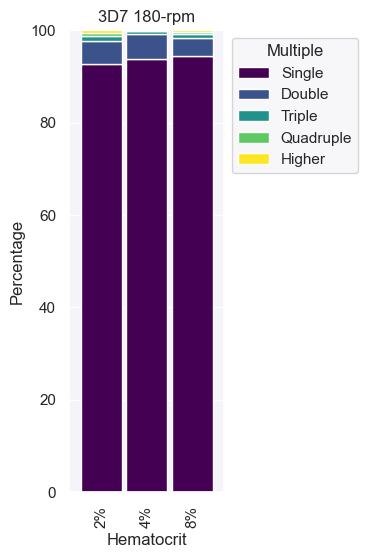

<Figure size 4500x7200 with 0 Axes>

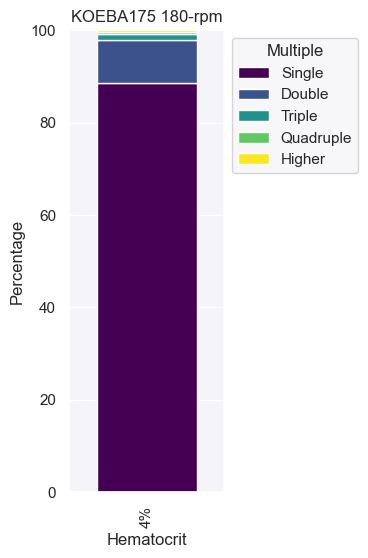

<Figure size 4500x7200 with 0 Axes>

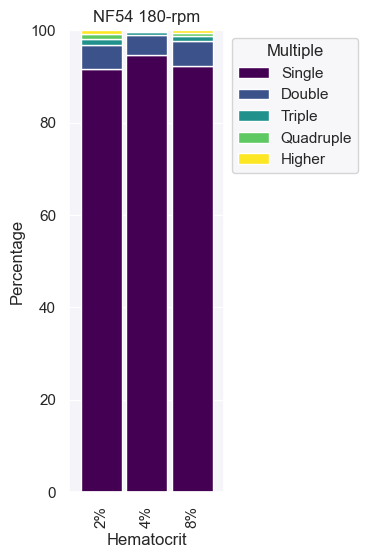

<Figure size 4500x7200 with 0 Axes>

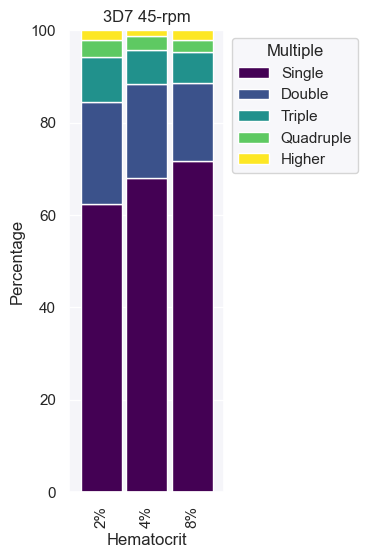

<Figure size 4500x7200 with 0 Axes>

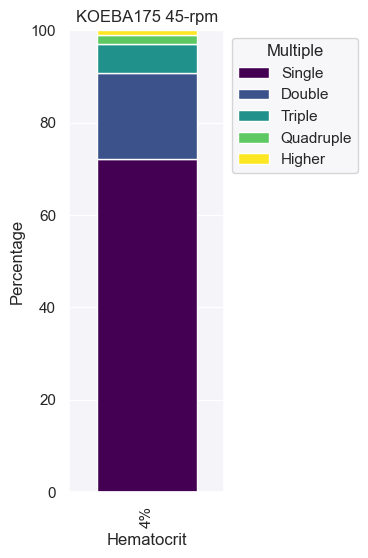

<Figure size 4500x7200 with 0 Axes>

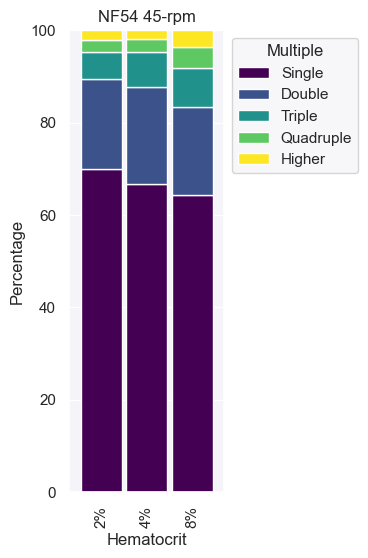

<Figure size 4500x7200 with 0 Axes>

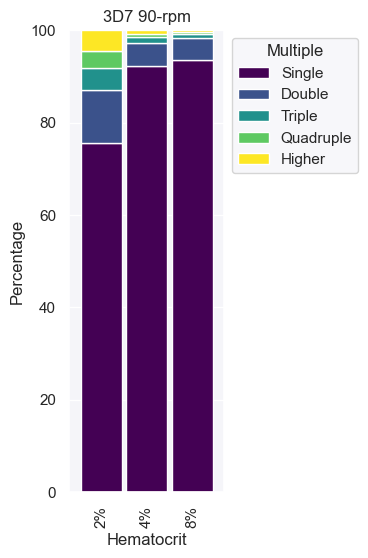

<Figure size 4500x7200 with 0 Axes>

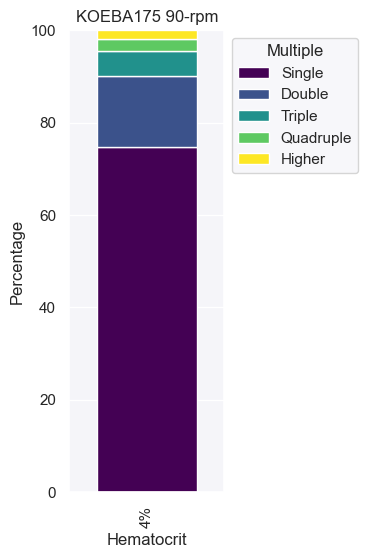

<Figure size 4500x7200 with 0 Axes>

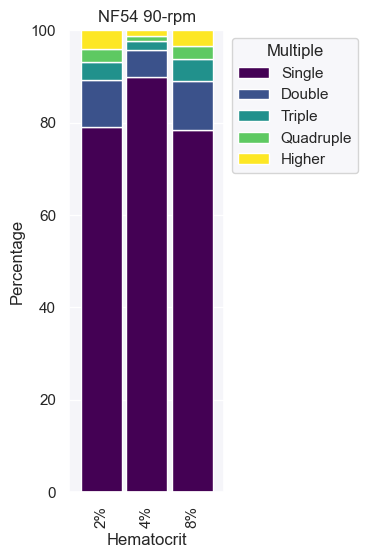

<Figure size 4500x7200 with 0 Axes>

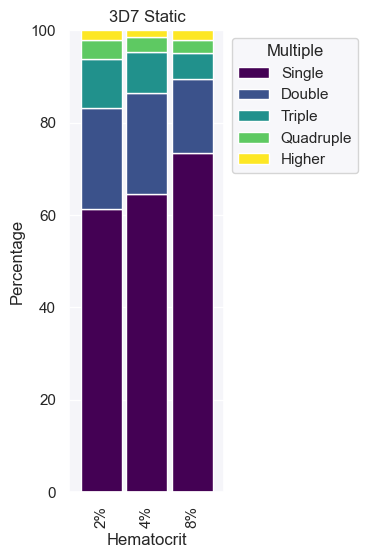

<Figure size 4500x7200 with 0 Axes>

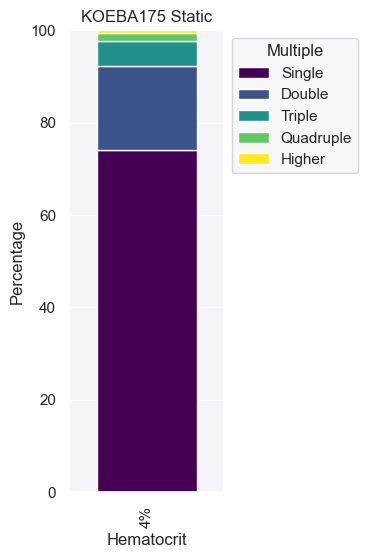

<Figure size 4500x7200 with 0 Axes>

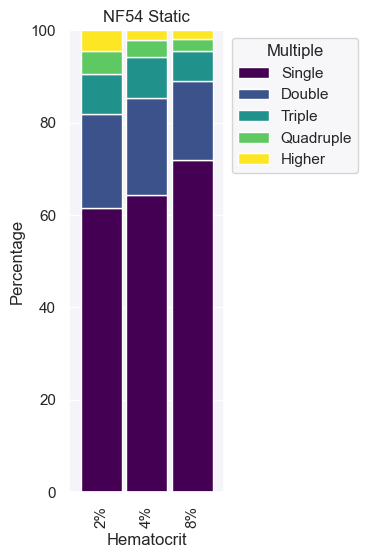

In [7]:
# Create a custom order for the 'Multiple' column
stack_order = ['Single', 'Double', 'Triple', 'Quadruple', 'Higher']
#Static
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1 ', 'KOPfs25 C3 ', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1 ', 'KORH2a C3 ', 'KORH4 C1']
#shaking
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1', 'KOPfs25 C3', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1', 'KORH2a C3 ', 'KORH4 C1']

sns.set_theme(#context='notebook', 
            #style='ticks', 
            style='darkgrid', 
            font='arial', 
            # font_scale=3.5
            ) 
            #   color_codes=True, 
            #   rc=None)

sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

def make_invasion_plot(df, label):
    plt.figure(figsize=(15, 24), dpi=300)

    # Create a pivot table to calculate the bottom positions for each 'Multiple' group
    pivot_df = df.pivot_table(index='Hematocrit', columns='Multiple', values='Percentage', fill_value=0)
    pivot_df = pivot_df[stack_order]  # Reorder the columns based on stack_order

    # Reorder the rows (strains) based on strain_order
    present_order = [l for l in hematocrit_levels if l in df['Hematocrit'].unique()]
    pivot_df = pivot_df.loc[present_order]

    # Create the stacked barplot using Seaborn
    ax = pivot_df.plot(kind='bar', stacked=True, cmap='viridis', width=0.9, figsize=(2,6))

    # Customize the plot as needed
    # plt.xlabel('Strain')
    plt.ylabel('Percentage')
    plt.title(label)

    # Show the plot
    plt.legend(title='Multiple')
    sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))

    plt.ylim((0,100))
    plt.xticks(rotation=90)

    output_folder = f'Multiinvation {experiment}'
    if not os.path.exists(output_folder): os.makedirs(output_folder)
    
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(f'{output_folder}/FIG {label}.svg', bbox_inches='tight')

for (speed, strain), dfg in df_melted.groupby(['Speed', 'Strain']):
    make_invasion_plot(dfg, label=f'{strain} {speed}')

Multiple     Single     Double    Triple  Quadruple    Higher
Speed                                                        
Static    64.488775  21.896384  8.969905   3.206296  1.438640
45-rpm    67.935384  20.371679  7.390845   2.951760  1.350332
90-rpm    92.153335   5.037926  1.220853   0.753796  0.834091
180-rpm   93.773917   5.422059  0.523778   0.181813  0.098432
Multiple     Single     Double    Triple  Quadruple    Higher
Speed                                                        
Static    64.325241  20.953394  8.855186   3.644865  2.221314
45-rpm    66.747636  20.899019  7.723056   2.721446  1.908843
90-rpm    89.825832   5.975262  1.891155   1.110647  1.197104
180-rpm   94.587072   4.407789  0.546519   0.230696  0.227923


,Well,Line,Speed,Multiple,Percentage,Clone,Strain,Hematocrit
0,A1,NF54 2%,Static,Double,22.405670,,NF54,2%
1,A1,NF54 2%,Static,Higher,2.372000,,NF54,2%
2,A1,NF54 2%,Static,Lates,9.103947,,NF54,2%
3,A1,NF54 2%,Static,Quadruple,3.536781,,NF54,2%
4,A1,NF54 2%,Static,Single,63.023533,,NF54,2%


<Figure size 3000x7200 with 0 Axes>

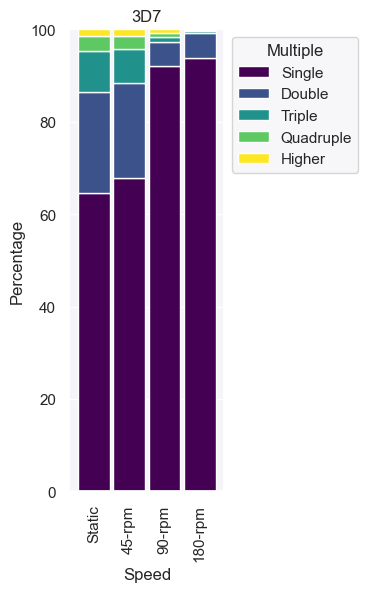

<Figure size 3000x7200 with 0 Axes>

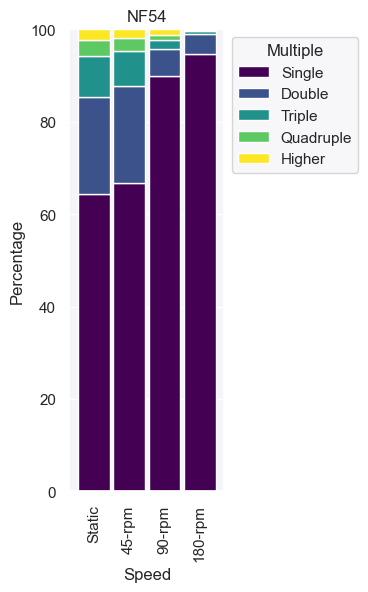

In [13]:
#This only works for GA3 
%matplotlib inline
# Create a custom order for the 'Multiple' column
stack_order = ['Single', 'Double', 'Triple', 'Quadruple', 'Higher']
speed_order = ['Static', '45-rpm', '90-rpm', '180-rpm']
#Static
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1 ', 'KOPfs25 C3 ', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1 ', 'KORH2a C3 ', 'KORH4 C1']
#shaking
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1', 'KOPfs25 C3', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1', 'KORH2a C3 ', 'KORH4 C1']

# sns.set_theme(#context='notebook', 
#             #style='ticks', 
#             style='darkgrid', 
#             font='arial', 
#             # font_scale=3.5
#             ) 
#             #   color_codes=True, 
#             #   rc=None)

# sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

def make_invasion_plot(df, label):
    plt.figure(figsize=(10, 24), dpi=300)

    # Create a pivot table to calculate the bottom positions for each 'Multiple' group
    pivot_df = df.pivot_table(index='Speed', columns='Multiple', values='Percentage', fill_value=0)
    pivot_df = pivot_df[stack_order]  # Reorder the columns based on stack_order

    # Reorder the rows (strains) based on strain_order
    present_line_order = [l for l in speed_order if l in df['Speed'].unique()]
    pivot_df = pivot_df.loc[present_line_order]
    print(pivot_df)
    # Create the stacked barplot using Seaborn
    ax = pivot_df.plot(kind='bar', stacked=True, cmap='viridis', width=0.9, figsize=(2,6))
    # sns.barplot(
    #     data=df,
    #     x='Speed',
    #     y='Percentage',
    #     hue='Multiple',
    #     stacked=True,
    # )
    # Customize the plot as needed
    # plt.xlabel('Strain')
    plt.ylabel('Percentage')
    plt.title(label)

    # Show the plot
    plt.legend(title='Multiple')
    sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))

    plt.ylim((0,100))
    plt.xticks(rotation=90)

    output_folder = f'Multiinvation {experiment}'
    if not os.path.exists(output_folder): os.makedirs(output_folder)
    
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(f'{output_folder}/{label}.svg', bbox_inches='tight')

df_melted['Strain'] = df_melted['Line'].str.split(' ').str[0]
for strain, dfg in df_melted.query('Hematocrit == "4%" and Strain == ["3D7", "NF54"]').groupby('Strain'):
    make_invasion_plot(dfg, label=f'{strain}')
df_melted.head()

In [ ]:
#GA2 
%matplotlib inline
# Create a custom order for the 'Multiple' column
stack_order = ['Single', 'Double', 'Triple', 'Quadruple', 'Higher']
speed_order = ['Static', '45-rpm', '90-rpm', '180-rpm']
#Static
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1 ', 'KOPfs25 C3 ', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1 ', 'KORH2a C3 ', 'KORH4 C1']
#shaking
#strain_order = ['NF54 ', 'KOP230P C3 ','KOP230P C5 ', 'KOPfs25 C1', 'KOPfs25 C3', 'KOEBA140 C3 ','KOEBA140 C4 ', 'KOEBA175 C6 ', 'KOEBA181 C1 ', 'KOEBA181 C2 ', 'KORH1 C1 ' , 'KORH2a C1', 'KORH2a C3 ', 'KORH4 C1']

# sns.set_theme(#context='notebook', 
#             #style='ticks', 
#             style='darkgrid', 
#             font='arial', 
#             # font_scale=3.5
#             ) 
#             #   color_codes=True, 
#             #   rc=None)

# sns.set_style(rc = {'axes.facecolor': '#F5F5F9'})

def make_invasion_plot(df, label):
    plt.figure(figsize=(10, 24), dpi=300)

    # Create a pivot table to calculate the bottom positions for each 'Multiple' group
    pivot_df = df.pivot_table(index='Plate', columns='Multiple', values='Percentage', fill_value=0)
    pivot_df = pivot_df[stack_order]  # Reorder the columns based on stack_order

    # Reorder the rows (strains) based on strain_order
    present_line_order = [l for l in plate_order if l in df['Plate'].unique()]
    pivot_df = pivot_df.loc[present_line_order]

    # Create the stacked barplot using Seaborn
    ax = pivot_df.plot(kind='bar', stacked=True, cmap='viridis', width=0.9, figsize=(2,6))
    # sns.barplot(
    #     data=df,
    #     x='Speed',
    #     y='Percentage',
    #     hue='Multiple',
    #     stacked=True,
    # )
    # Customize the plot as needed
    # plt.xlabel('Strain')
    plt.ylabel('Percentage')
    plt.title(label)

    # Show the plot
    plt.legend(title='Multiple')
    sns.move_legend(plt.gca(), "upper left", bbox_to_anchor=(1, 1))

    plt.ylim((0,100))
    plt.xticks(rotation=90)

    output_folder = f'Multiinvation {experiment}'
    if not os.path.exists(output_folder): os.makedirs(output_folder)
    
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig(f'{output_folder}/{label}.svg', bbox_inches='tight')

df_melted['Strain'] = df_melted['Line'].str.split(' ').str[0]
for (strain, speed), dfg in df_melted.groupby(['Strain', 'Speed']):
    make_invasion_plot(dfg, label=f'{strain}, {speed}')
df_melted.head()

KeyError: 'Plate'

<Figure size 3000x7200 with 0 Axes>

['Single' 'Double' 'Triple' 'Quadruple' 'Higher' 'Lates']


c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Emma Jones\.conda\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

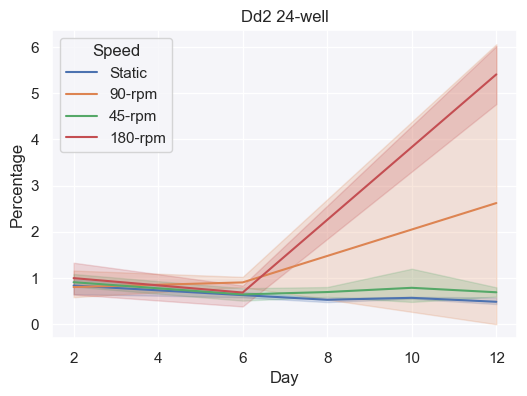

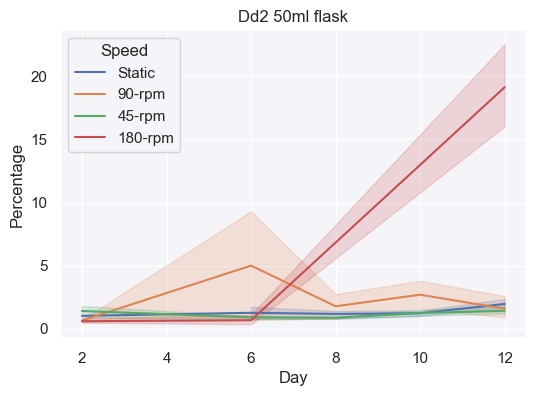

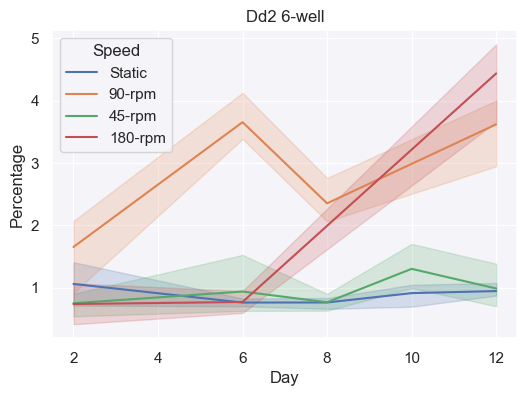

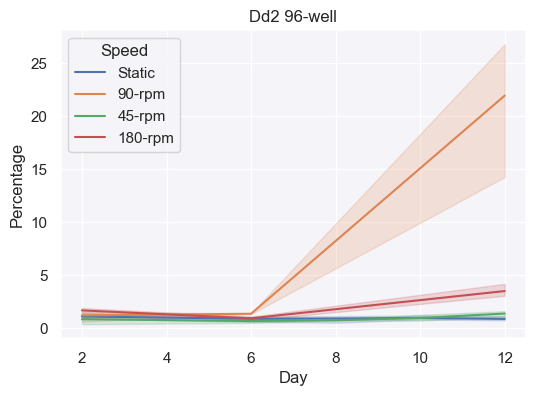

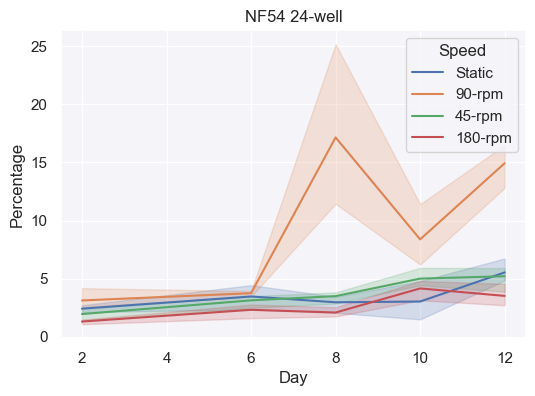

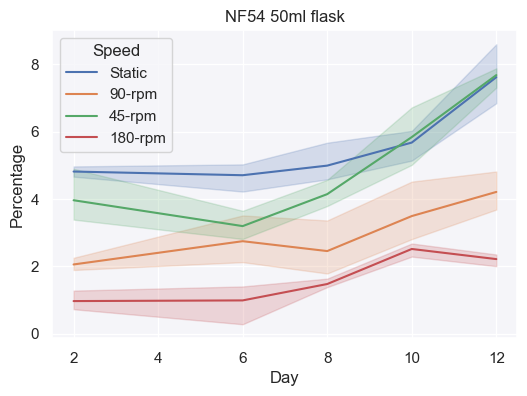

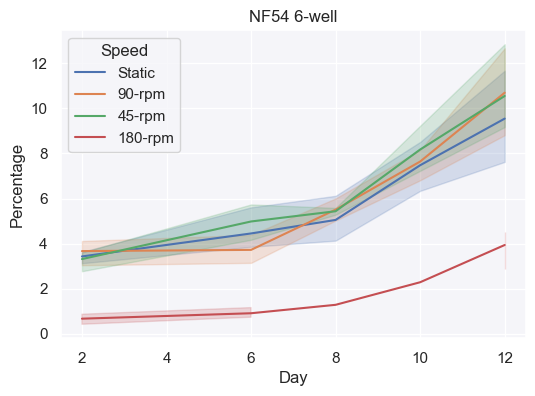

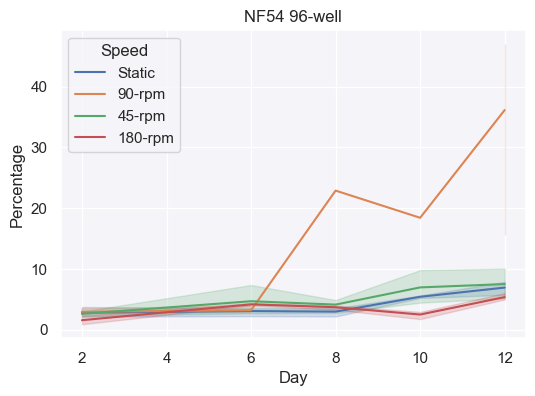

In [ ]:
def plot_lates_per_day(df, label):
    plt.figure(figsize=(6,4), dpi=100)
    sns.lineplot(
        data=df,
        x='Day',
        y='Percentage',
        hue='Speed',
    )
    plt.title(label)

print(df_melted_per_day['Multiple'].unique())

for line, dfg in df_melted_per_day.query('Multiple == "Lates"').groupby('Line'):
    plot_lates_per_day(dfg, line)